In [1]:
import gudhi
import numpy as np
import networkx as nx

In [2]:
def PrintSimplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        PrintSimplices(simpcomplex)
    '''
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")
        
def DrawSimplicialComplex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.
    If pos is a dict 
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }
        
    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        DrawSimplicialComplex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        DrawSimplicialComplex(simpcomplex, pos=pos)
    '''
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')
    
def NumberOfConnectedComponents(simpcomplex, verbose = 'True'):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        NumberOfConnectedComponents(simpcomplex)
    '''    
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = 'True'):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        EulerCharacteristic(simpcomplex)
    '''
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

Exercício 22

The simplicial complex has Euler characteristic equal to 0.


0

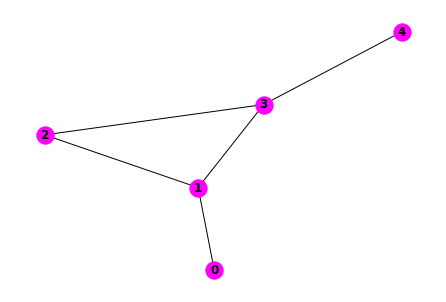

In [4]:
#Classe do A: A,D,O,P,Q,R,
A = gudhi.SimplexTree()
A.insert([0,1])
A.insert([1,2])
A.insert([1,3])
A.insert([2,3])
A.insert([3,4])
DrawSimplicialComplex(A)
EulerCharacteristic(A)


The simplicial complex has Euler characteristic equal to -1.


-1

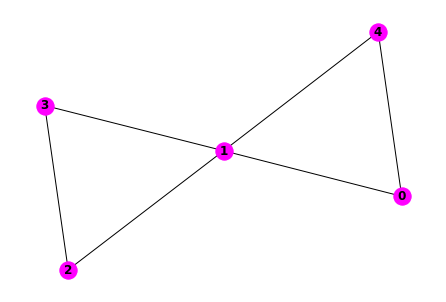

In [5]:
#Classe do B: B
B = gudhi.SimplexTree()
B.insert([0,1])
B.insert([1,2])
B.insert([1,3])
B.insert([2,3])
B.insert([0,4])
B.insert([1,4])
DrawSimplicialComplex(B)
EulerCharacteristic(B)


The simplicial complex has Euler characteristic equal to 1.


1

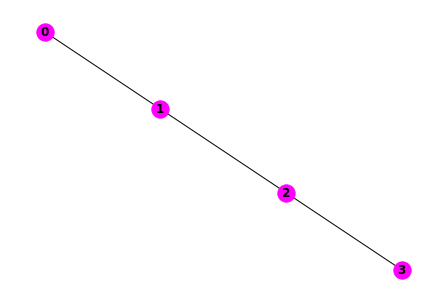

In [6]:
#Classe do C: C,E,F,G,H,I,J,K,L,M,N,S,T,U,V,W,X,Y,Z
C = gudhi.SimplexTree()
C.insert([0,1])
C.insert([1,2])
C.insert([2,3])
DrawSimplicialComplex(C)
EulerCharacteristic(C)


The simplicial complex has Euler characteristic equal to 1.


'\nX = gudhi.SimplexTree()\nX.insert([0,1])\nX.insert([1,2])\nX.insert([1,3])\nX.insert([1,4])\nDrawSimplicialComplex(X)\nEulerCharacteristic(X)\n'

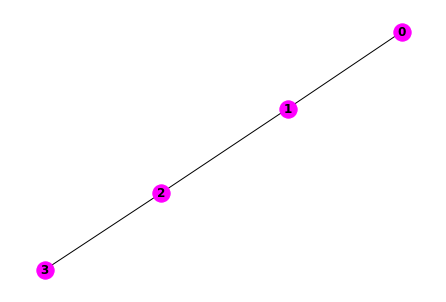

In [ ]:
#Sim. No caso do alfabeto sim, pois há três classes de homotopia e as características de Euler delas são diferentes(0,-1 e 1)

Exercício 23

The simplicial complex has Euler characteristic equal to 0.


0

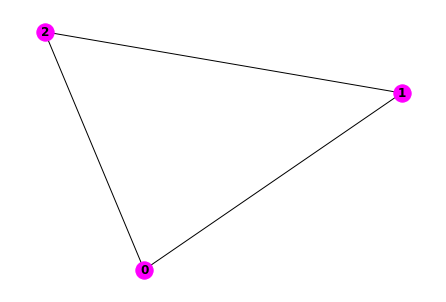

In [3]:
#n=1

b1 = gudhi.SimplexTree()
b1.insert([0,1])
b1.insert([0,2])
b1.insert([1,2])
DrawSimplicialComplex(b1)
EulerCharacteristic(b1)

The simplicial complex has Euler characteristic equal to -1.


-1

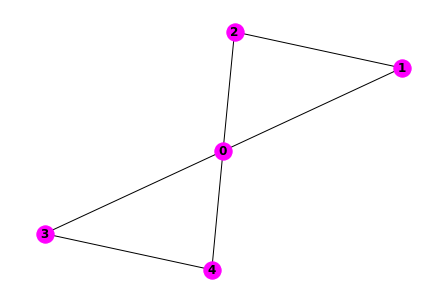

In [33]:


#n=2
b2 = gudhi.SimplexTree()
b2.insert([0,1])
b2.insert([1,2])
b2.insert([0,2])
b2.insert([0,3])
b2.insert([0,4])
b2.insert([3,4])
DrawSimplicialComplex(b2)
EulerCharacteristic(b2)

The simplicial complex has Euler characteristic equal to -2.


-2

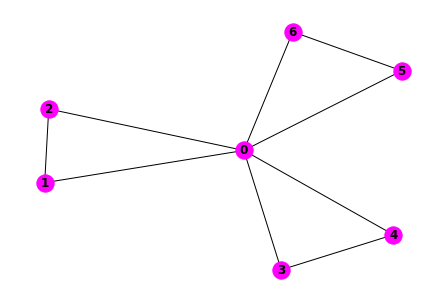

In [34]:
#n=3
b3 = gudhi.SimplexTree()
b3.insert([0,1])
b3.insert([1,2])
b3.insert([0,2])
b3.insert([0,3])
b3.insert([0,4])
b3.insert([3,4])
b3.insert([0,5])
b3.insert([0,6])
b3.insert([5,6])
DrawSimplicialComplex(b3)
EulerCharacteristic(b3)

The simplicial complex has Euler characteristic equal to -3.


-3

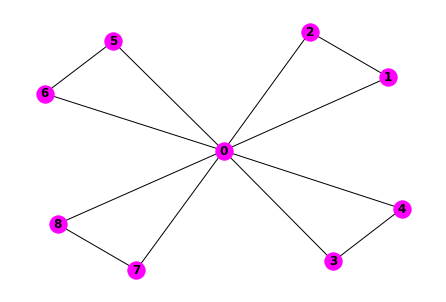

In [35]:
#n=4
b4 = gudhi.SimplexTree()
b4.insert([0,1])
b4.insert([1,2])
b4.insert([0,2])
b4.insert([0,3])
b4.insert([0,4])
b4.insert([3,4])
b4.insert([0,5])
b4.insert([0,6])
b4.insert([5,6])
b4.insert([0,7])
b4.insert([0,8])
b4.insert([7,8])

DrawSimplicialComplex(b4)
EulerCharacteristic(b4)

Exercício 24

The simplicial complex has Euler characteristic equal to 0.


0

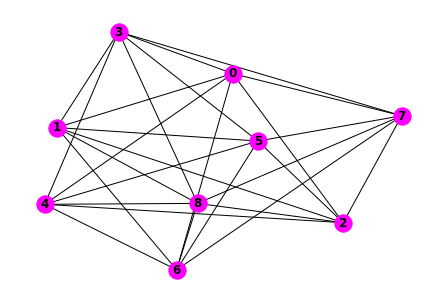

In [36]:
toro = gudhi.SimplexTree()
toro.insert([0,1,3])
toro.insert([1,3,5])
toro.insert([1,2,5])
toro.insert([2,5,7])
toro.insert([0,2,7])
toro.insert([0,3,7])
toro.insert([3,4,5])
toro.insert([4,5,6])
toro.insert([5,6,7])
toro.insert([6,7,8])
toro.insert([3,7,8])
toro.insert([3,4,8])
toro.insert([0,4,6])
toro.insert([0,1,6])
toro.insert([1,6,8])
toro.insert([1,2,8])
toro.insert([2,4,8])
toro.insert([0,2,4])
DrawSimplicialComplex(toro)
EulerCharacteristic(toro)

Exercício 25

In [81]:
def complexo_de_proximidade(pontos,r):
    complexo = gudhi.SimplexTree()
    
    #adicionando vertices
    for i in range(len(pontos)):
        complexo.insert([i])

    #adicionando arestas
    for i in range(len(pontos)):
        for j in range(i+1,len(pontos)):
            if np.linalg.norm(np.array(pontos[i])-np.array(pontos[j]))<=r:
                complexo.insert([i,j])
    return complexo
        

In [82]:
pontos = {0: [0.29409772548731694, 0.6646626625013836],
          1: [0.01625840776679577, 0.1676405753593595],
          2: [0.15988905150272759, 0.6411323760808338],
          3: [0.9073191075894482, -0.16417982219713312],
          4: [-0.18661467838673884, 0.31618948583046413],
          5: [-0.3664040542098381, 0.9098590694955988],
          6: [-0.43753448716144905, -0.8820102274699417],
          7: [0.4096730199915961, -0.23801426675264126],
          8: [0.5903822103474676, -0.7285102954232894],
          9: [0.9133851839417766, -0.6606557328320093],
          10: [-0.15516122940597588, 0.7565411235103017],
          11: [-0.38626186295039866, -0.3662321656058476],
          12: [0.005209710070218199, 0.27655964872153116],
          13: [0.670078068894711, -0.00932202688834849],
          14: [-0.011268465716772091, 0.24340880308017376],
          15: [-0.6441978411451603, -0.9672635759413206],
          16: [-0.2841794022401025, -0.6734801188906114],
          17: [-0.15473260248990717, -0.1365357396855129],
          18: [0.7177096105982121, 0.9378197891592468],
          19: [-0.4677068504994166, 0.1533930130294956],
          20: [-0.32379909116817096, 0.9694800649768063],
          21: [-0.2886940472879451, -0.039544695812395725],
          22: [-0.5900701743351606, 0.8350804500575086],
          23: [0.14931959728335853, 0.869106793774487],
          24: [-0.14500672678238824, -0.3170082291070364],
          25: [0.07324547392476122, 0.6653572287065117],
          26: [-0.662990048258566, 0.1908198608241125],
          27: [-0.25641262456436276, -0.9844196180941553],
          28: [-0.5105685407819842, -0.4236604017060557],
          29: [0.6792549581008038, -0.026215820387260003]}


In [83]:
complexo = complexo_de_proximidade(pontos,1)
NumberOfConnectedComponents(complexo)

The simplicial complex admits 1 connected component(s).


1

In [84]:
complexo = complexo_de_proximidade(pontos,0.5)
NumberOfConnectedComponents(complexo)

The simplicial complex admits 3 connected component(s).


3

In [85]:
complexo = complexo_de_proximidade(pontos,0.45)
NumberOfConnectedComponents(complexo)

The simplicial complex admits 4 connected component(s).


4

In [86]:
complexo = complexo_de_proximidade(pontos,0.35)
NumberOfConnectedComponents(complexo)

The simplicial complex admits 5 connected component(s).


5

In [87]:
complexo = complexo_de_proximidade(pontos,0.3)
NumberOfConnectedComponents(complexo)

The simplicial complex admits 9 connected component(s).


9

In [88]:
complexo = complexo_de_proximidade(pontos,0.2)
NumberOfConnectedComponents(complexo)

The simplicial complex admits 19 connected component(s).


19

In [89]:
complexo = complexo_de_proximidade(pontos,0.1)
NumberOfConnectedComponents(complexo)

The simplicial complex admits 25 connected component(s).


25

Exercício 26

In [3]:
def random_graph(n,prob):  #Número de vértices e a probabilidade de cada vértice entrar
    rg = gudhi.SimplexTree()

    #adicionando os vértices
    for i in range(n):
        rg.insert([i])

    #adicionando arestas
    for i in range(n):
        for j in range(i+1,n):
            if np.random.choice([0,1],p=[prob,1-prob]) == 0:
                rg.insert([i,j])
    return rg

The simplicial complex admits 9 connected component(s).


9

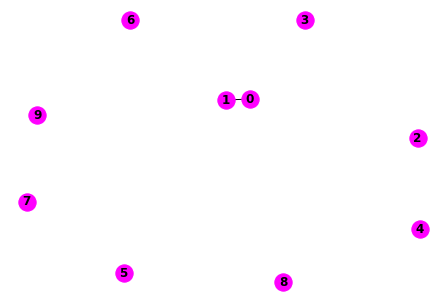

In [10]:
rg = random_graph(10,0.05)
DrawSimplicialComplex(rg)
NumberOfConnectedComponents(rg)

The simplicial complex admits 7 connected component(s).


7

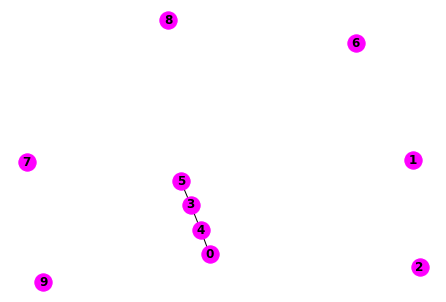

In [98]:
rg = random_graph(10,0.1)
DrawSimplicialComplex(rg)
NumberOfConnectedComponents(rg)

The simplicial complex admits 4 connected component(s).


4

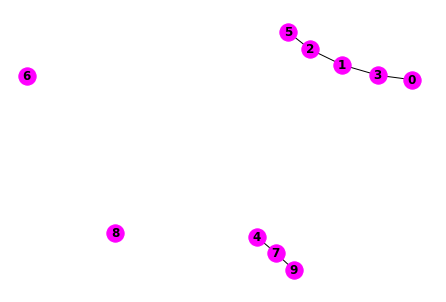

In [104]:
rg = random_graph(10,0.2)
DrawSimplicialComplex(rg)
NumberOfConnectedComponents(rg)

The simplicial complex admits 1 connected component(s).


1

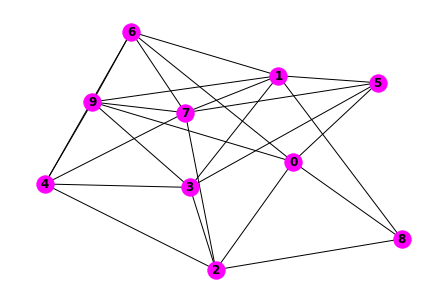

In [ ]:
rg = random_graph(10,0.5)
DrawSimplicialComplex(rg)
NumberOfConnectedComponents(rg)

The simplicial complex admits 80 connected component(s).


80

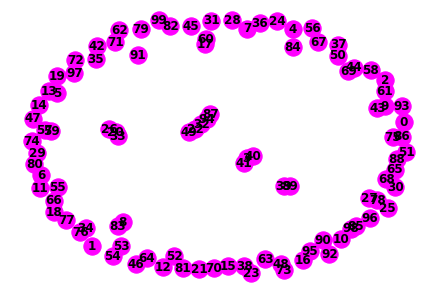

In [17]:
rg = random_graph(100,0.005)
DrawSimplicialComplex(rg)
NumberOfConnectedComponents(rg)

The simplicial complex admits 60 connected component(s).


60

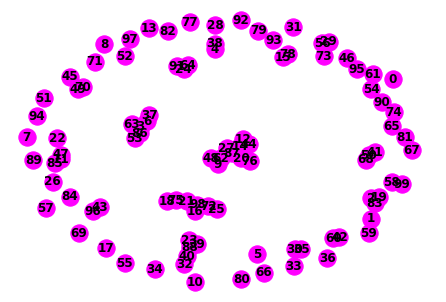

In [4]:
rg = random_graph(100,0.009)
DrawSimplicialComplex(rg)
NumberOfConnectedComponents(rg)

The simplicial complex admits 35 connected component(s).


35

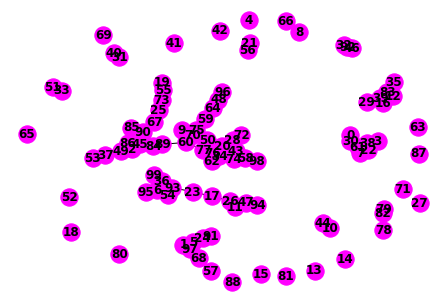

In [7]:
rg = random_graph(100,0.015)
DrawSimplicialComplex(rg)
NumberOfConnectedComponents(rg)

The simplicial complex admits 2 connected component(s).


2

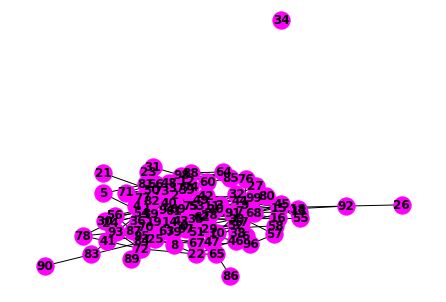

In [9]:
rg = random_graph(100,0.05)
DrawSimplicialComplex(rg)
NumberOfConnectedComponents(rg)

The simplicial complex admits 1 connected component(s).


1

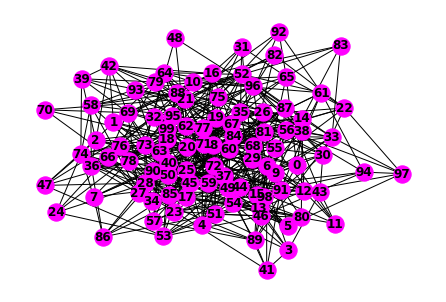

In [12]:
rg = random_graph(100,0.1)
DrawSimplicialComplex(rg)
NumberOfConnectedComponents(rg)